### Group 9
#### Goodness Chizorom Nwokebu
WTF/23/DS/B/059

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings


In [2]:
# We start by reading the file and getting a sample data.
choco_bars = pd.read_csv('chocolate_bars.csv')
pd.set_option('display.max_columns', 50)
choco_bars.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
choco_bars.head(15)#to get 15 samples of our data

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,3.0,"B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75


### DATA DESCRIBING
1. Getting a general overview of the dataframe
2. Checking the data for null values
3. Check if there are duplicated rows in the dataframe.

In [4]:
choco_bars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [6]:
choco_bars.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [5]:
#checking for duplicates
choco_bars.duplicated().value_counts()

False    2530
dtype: int64

**COMMENT**
- num_ingredients and ingredients have 87 null values
- They were no duplicated values across each rows
- Each value seem to have the appropriate data type

### DATA CLEANING
We would be dropping the null values.

In [6]:
choco_bars.dropna(inplace = True)

### Average Rating by Country of Origin

In [7]:
bean_origin_avg_rating = choco_bars.groupby('bean_origin').rating.mean().reset_index().sort_values(by = ['rating'],ascending = False)
bean_origin_avg_rating 

,bean_origin,rating
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
53,Thailand,3.300000
...,...,...
30,Martinique,2.750000
43,Sierra Leone,2.750000
38,Principe,2.750000
47,St.Vincent-Grenadines,2.750000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'Sao Tome & Principe'),
  Text(2, 0, 'Solomon Islands'),
  Text(3, 0, 'Congo'),
  Text(4, 0, 'Thailand'),
  Text(5, 0, 'Cuba'),
  Text(6, 0, 'Vietnam'),
  Text(7, 0, 'Papua New Guinea'),
  Text(8, 0, 'Madagascar'),
  Text(9, 0, 'Haiti'),
  Text(10, 0, 'Brazil'),
  Text(11, 0, 'Guatemala'),
  Text(12, 0, 'Nicaragua'),
  Text(13, 0, 'Sulawesi'),
  Text(14, 0, 'Gabon'),
  Text(15, 0, 'Suriname'),
  Text(16, 0, 'Tobago'),
  Text(17, 0, 'Australia'),
  Text(18, 0, 'Trinidad'),
  Text(19, 0, 'Tanzania'),
  Text(20, 0, 'Belize'),
  Text(21, 0, 'Honduras'),
  Text(22, 0, 'Venezuela'),
  Text(23, 0, 'Peru'),
  Text(24, 0, 'Dominican Republic'),
  Text(25, 0, 'U.S.A.'),
  Text(26, 0,

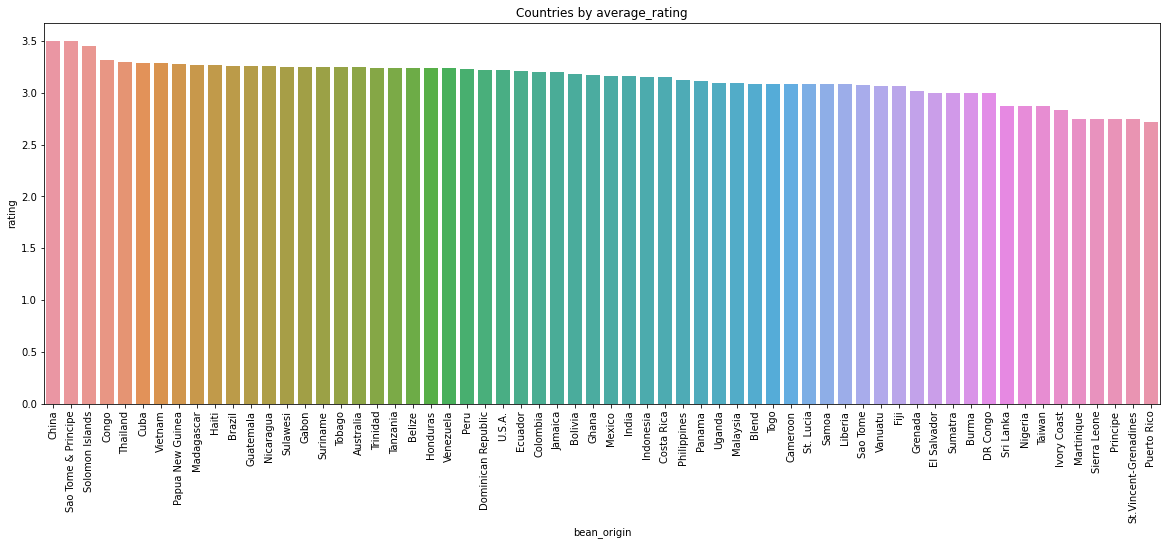

In [8]:
plt.figure(figsize = (20,7))
plt.title('Countries by average_rating')
sns.barplot(x = 'bean_origin', y = 'rating',data =bean_origin_avg_rating)
plt.xticks(rotation = 90)




### Chocolate bars reviewed for each of those countries

In [16]:
bars_reviewed = choco_bars.groupby('bean_origin').bar_name.count().reset_index()
bars_reviewed.rename(columns = {'bar_name' :'total_bars'}, inplace = True)
bars_reviewed

,bean_origin,total_bars
0,Australia,3
1,Belize,74
2,Blend,144
3,Bolivia,79
4,Brazil,77
...,...,...
57,U.S.A.,31
58,Uganda,18
59,Vanuatu,12
60,Venezuela,246


In [14]:
bars_reviewed2 = choco_bars.groupby('company_location').bar_name.count().reset_index()
bars_reviewed.rename(columns = {'bar_name' :'total_bars'}, inplace = True)
bars_reviewed

,company_location,total_bars
0,Amsterdam,12
1,Argentina,4
2,Australia,51
3,Austria,30
4,Belgium,60
...,...,...
62,U.S.A.,1118
63,Vanuatu,4
64,Venezuela,31
65,Vietnam,16


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Belize'),
  Text(2, 0, 'Blend'),
  Text(3, 0, 'Bolivia'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'Burma'),
  Text(6, 0, 'Cameroon'),
  Text(7, 0, 'China'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Congo'),
  Text(10, 0, 'Costa Rica'),
  Text(11, 0, 'Cuba'),
  Text(12, 0, 'DR Congo'),
  Text(13, 0, 'Dominican Republic'),
  Text(14, 0, 'Ecuador'),
  Text(15, 0, 'El Salvador'),
  Text(16, 0, 'Fiji'),
  Text(17, 0, 'Gabon'),
  Text(18, 0, 'Ghana'),
  Text(19, 0, 'Grenada'),
  Text(20, 0, 'Guatemala'),
  Text(21, 0, 'Haiti'),
  Text(22, 0, 'Honduras'),
  Text(23, 0, 'India'),
  Text(24, 0, 'Indonesia'),
  Text(25, 0, 'Ivory Coast'),
  Text(26, 0, 'Jamaica'),
  Text(27, 0, 'Lib

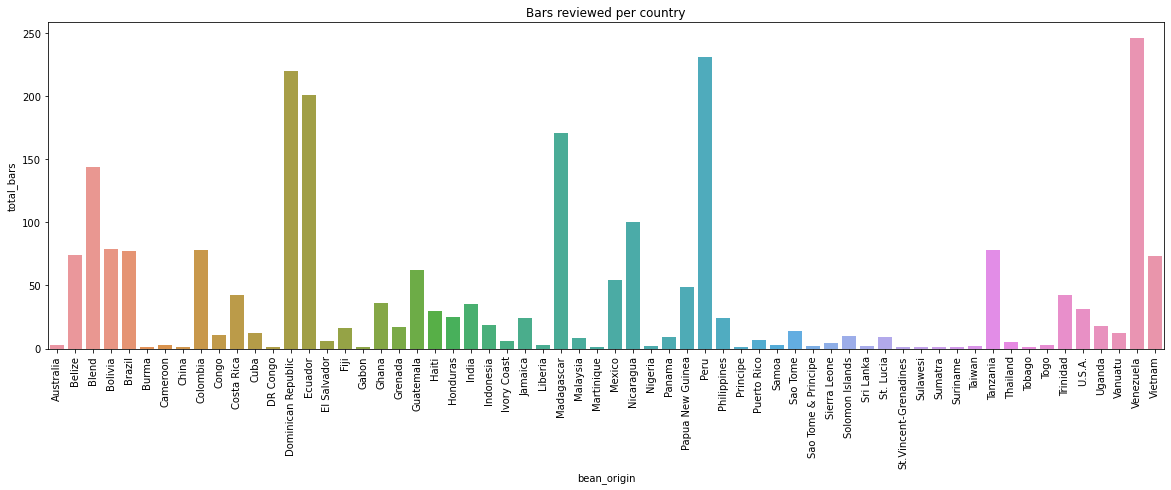

In [17]:
plt.figure(figsize = (20,6))
plt.title('Bars reviewed per country')
sns.barplot(x = 'bean_origin', y = 'total_bars', data = bars_reviewed)
plt.xticks(rotation = 90)



### Is the cocoa bean origin an indicator of quantity?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, 'Tanzania'),
  Text(1, 0, 'Dominican Republic'),
  Text(2, 0, 'Madagascar'),
  Text(3, 0, 'Fiji'),
  Text(4, 0, 'Venezuela'),
  Text(5, 0, 'Uganda'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Bolivia'),
  Text(8, 0, 'Peru'),
  Text(9, 0, 'Panama'),
  Text(10, 0, 'Colombia'),
  Text(11, 0, 'Burma'),
  Text(12, 0, 'Brazil'),
  Text(13, 0, 'Papua New Guinea'),
  Text(14, 0, 'Ecuador'),
  Text(15, 0, 'Cuba'),
  Text(16, 0, 'Togo'),
  Text(17, 0, 'Sao Tome'),
  Text(18, 0, 'Mexico'),
  Text(19, 0, 'Vanuatu'),
  Text(20, 0, 'Indonesia'),
  Text(21, 0, 'Trinidad'),
  Text(22, 0, 'Vietnam'),
  Text(23, 0, 'Nicaragua'),
  Text(24, 0, 'Ghana'),
  Text(25, 0, 'Belize'),
  Text(26, 0, 'Blend'),
  Text(27, 0, 'Jam

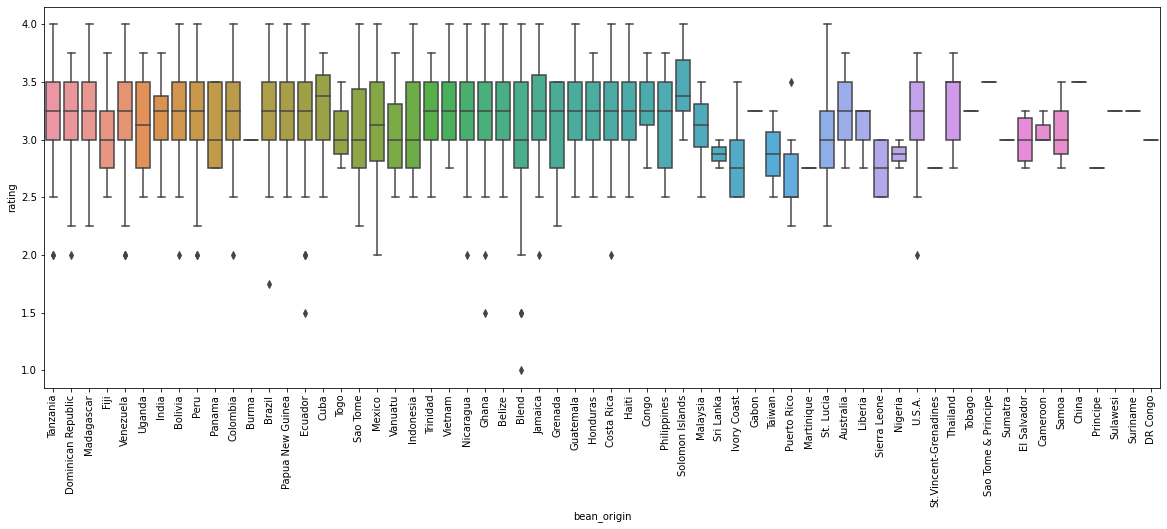

In [18]:
plt.figure(figsize = (20,7))
sns.boxplot(x = choco_bars.bean_origin, y = choco_bars.rating)
plt.xticks(rotation = 90)



**COMMENT**
1. We used how the chocolate was rated to determing the quality. The higher the rating, the more quality it has.
2. A boxplot shows the distribution of numeric data values. For each country, we can be able to see how distributed they are. Taking Tanzania for example, a chocolate bar produced with the bean gotten from it, recieved a rating of 4.0 but it also recieved a rating 2.5(if we ignore the outliers). The rating values are not close but far apart. This proves that bean_origin an indicator of quantity.

### How does cocoa content relate to rating?


In [19]:
choco_bars2 = choco_bars.loc[(choco_bars.rating >= 3.0) &(choco_bars.cocoa_percent >= 70)]


<AxesSubplot:title={'center':'Correlation of cocoa_percent and rating'}, xlabel='rating', ylabel='cocoa_percent'>

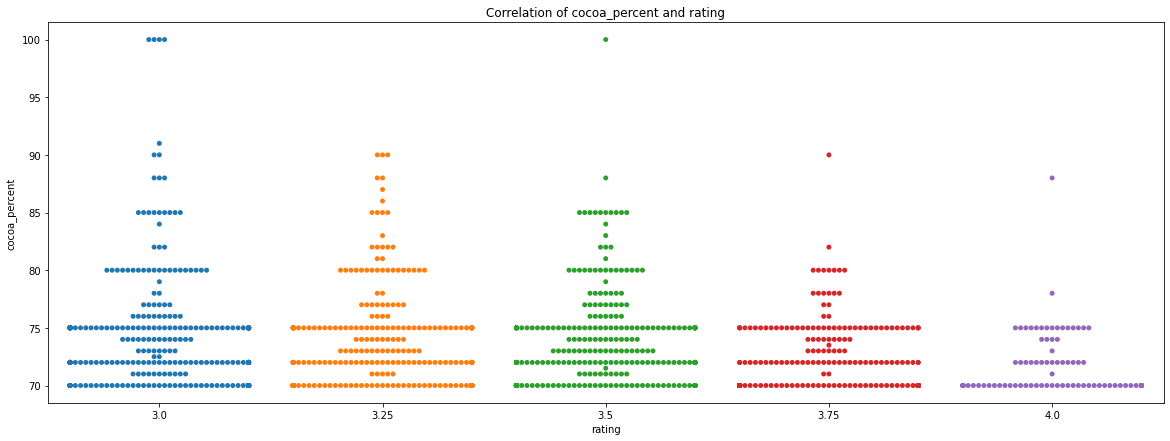

In [20]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (20,7))
plt.title('Correlation of cocoa_percent and rating')
sns.swarmplot(x = 'rating' , y = 'cocoa_percent', data = choco_bars2)


**COMMENTS**
- Cocoa_percent and rating is not correlated

### Average cocoa rating for bars with higher rating?

In [21]:
choco_bars3 = choco_bars.loc[choco_bars.rating > 3.5]
choco_bars3.cocoa_percent.mean()

70.99630541871922

### Average rating of bars with and without Lecithin(L  in the ingredients)

In [22]:
#To know the unique ingredients used 
choco_bars.ingredients.unique()

array(['B,S,C', 'B,S,C,L', 'B,S', 'B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
       'B,S,C,V,Sa', 'B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L', 'B,S,V',
       'B,S*,C,L', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa', 'B,S*,V,L', 'B,C',
       'B,S*,C,V', 'B,S,C,L,Sa'], dtype=object)

In [23]:
#chocolate bars with lecithin. #cbnl means choco bars without lecithin while cbl means choco bars with lecithin
cbnl = choco_bars.loc[choco_bars.ingredients.isin(['B,S,C', 'B,S', 'B,S,C,V', 
       'B,S,C,V,Sa',  'B,S*', 'B', 'B,S*,C', 
       'B,S,V', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa',
       'B,C', 'B,S*,C,V', ])]
cbl = choco_bars.loc[choco_bars.ingredients.isin(['B,S,C,L', 'B,S,C,V,L','B,S,C,V,L,Sa','B,S,V,L','B,S,L', 'B,S*,C,L', 'B,S*,V,L','B,S,C,L,Sa'])]


In [24]:
cbnl.rating.mean()

3.2251282051282053

In [25]:
cbl.rating.mean()

3.150608519269777

**COMMENTS**
- From the rating, people preferred chocholate without lecthin to chocolate with lecithin

### Summary Findings
1. From this data, a total of 62 countries were recorded to produce data for chocolate bars. 
2. The bean_origin influence on the rating is low.
3. On the production of your chocolate bars is best to avoid lecithin.
4. Competition might be higher in U.S.A as more chocolate bars are produced in it. 
5. Beans(B), Sugar(S) and Cocoa_butter(C) are the most popular ingredients used in the prodction of chocolate bars.

